https://kiranaclub.notion.site/Kirana-Club-ML-DS-Internship-Assignment-f2ae881f1e8c45b4b3e5a0f136e9e379


<h1>Section 1:</h1> <p>I have considered the data for Year 2009-10 which is the first sheet in excel file. The same analysis can be done for other years as well. Otherwise to consider analysis for all years, combime all the sheets data and perform the alalysis, given below.</p><br>

<p style="color:red">Note: I am not considering the 'Country' column as in the task, it was given the data is for a single store. Also no store id column is given, so it doesn't make sense to have a country column.</p><br>

<h4>1.Customer categories-</h4>
a. High value customer- We will see which customer has the highest value of purchase. We will see the total purchase of each customer and then we will see the top 10 customers who have the highest purchase value.<br>
b. Repeat customer- Customers who have purchased often over the year. Can also be termed as <b>loyal customers</b>.<br>
c. New customer- Customers who have purchased for the first time (low number of times) in the year.<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('RetailPulseAssignmentData.csv')
df = df.drop(labels="Country", axis=1)
df = df.dropna()
df = df.loc[(df['Quantity'] > 0) & (df['Price'] > 0)]
df['Sales'] = df['Price'] * df['Quantity']
#df

<h5>1.High value customer</h5>

In [2]:
df1=df.copy()
df1 = df1.groupby("Customer ID")["Sales"].sum().reset_index()
df1 = df1.sort_values(by='Sales', ascending=False).reset_index(drop=True)
df1['Sales'] = df1['Sales'].round(2)
#df1

Top 10 highest value customers are:<br>
![high_value_customers.png](images/1.JPG)

<h5>2.Repeat (loyal) customer & New customers-</h5>
Each customer has a unqiue id. The number of times a particular customer has made purchase is the number of times a particular 'customer id' has different 'Invoice'. So I have counted the number of times different 'Invoice' occurs for a particular 'customer id' and stored this data into 'Purchase_freq' column. 
Repeat (loyal) customers will have high purchase frequency and New customers will have lower purchase frequency<br>

In [3]:
df2=df.copy()
#df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])
customer_freq = df2.groupby('Customer ID')['Invoice'].nunique().reset_index()
customer_freq = customer_freq.sort_values(by='Invoice', ascending=False).reset_index(drop=True)
customer_freq = customer_freq.sort_values(by='Invoice').reset_index(drop=True)

Top 10 repeat (loyal) customers are:<br>
![repeat_customers.png](images/2.JPG)

Top 10 New customers are (with low number of purchases):<br>
![new_customers.png](images/3.JPG)

<h4>3.Popular time of the year</h4>

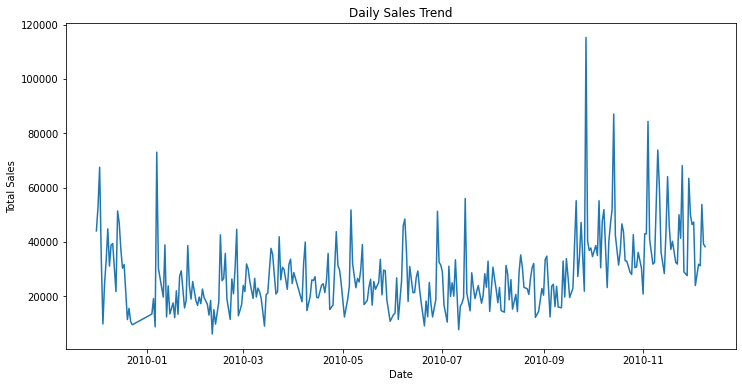

In [4]:
df3=df.copy()
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])
df3['Date'] = df3['InvoiceDate'].dt.date
daily_sales = df3.groupby('Date')['Sales'].sum()
#daily_sales = daily_sales.sort_values(by='InvoiceDate').reset_index(drop=True)

daily_sales.plot(kind='line', figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')
plt.show()

Days of highest sales:<br>
![new_customers.png](images/4.JPG)<br>
There is no pattern seen on the graph. Some days are marked with high sales, this may be due to holidays/weekends. I believed that days before major holidays like Christmas, New Year would have high sales. But the data does not show any such pattern. <br>
<b>No seasonality</b> is seen in the data.<br>

<h4>5.Customer lifetime</h4>

In [5]:
df4=df.copy()
df4['InvoiceDate'] = pd.to_datetime(df4['InvoiceDate'])
customer_lifetime = df4.groupby('Customer ID').agg(lifetime_start=('InvoiceDate', 'min'), lifetime_end=('InvoiceDate', 'max'))
customer_lifetime['Lifetime'] = customer_lifetime['lifetime_end'] - customer_lifetime['lifetime_start']
customer_lifetime['Lifetime'] = customer_lifetime['Lifetime'].dt.days

Lifetime of customers:<br>
![new_customers.png](images/5.JPG)<br>
This is done by subtracting the last day customer purchased from the first day customer purchased<br>